# Description

Runs k-means on the z_score_std version of the data.

# Environment variables

In [1]:
from IPython.display import display

import conf

N_JOBS = conf.GENERAL["N_JOBS"]
display(N_JOBS)

2

In [2]:
%env MKL_NUM_THREADS=$N_JOBS
%env OPEN_BLAS_NUM_THREADS=$N_JOBS
%env NUMEXPR_NUM_THREADS=$N_JOBS
%env OMP_NUM_THREADS=$N_JOBS

env: MKL_NUM_THREADS=2
env: OPEN_BLAS_NUM_THREADS=2
env: NUMEXPR_NUM_THREADS=2
env: OMP_NUM_THREADS=2


# Modules loading

In [3]:
%load_ext autoreload
%autoreload 2

In [4]:
from pathlib import Path

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from utils import generate_result_set_name

# Settings

In [5]:
np.random.seed(0)

In [6]:
INITIAL_RANDOM_STATE = 0

## Input data

In [7]:
INPUT_SUBSET = "z_score_std"

In [8]:
INPUT_STEM = "projection-smultixcan-efo_partial-mashr-zscores"

In [9]:
input_filepath = Path(
    conf.RESULTS["DATA_TRANSFORMATIONS_DIR"],
    INPUT_SUBSET,
    f"{INPUT_SUBSET}-{INPUT_STEM}.pkl",
).resolve()
display(input_filepath)

assert input_filepath.exists(), "Input file does not exist"

input_filepath_stem = input_filepath.stem
display(input_filepath_stem)

PosixPath('/home/miltondp/projects/labs/greenelab/phenoplier/base/results/data_transformations/z_score_std/z_score_std-projection-smultixcan-efo_partial-mashr-zscores.pkl')

'z_score_std-projection-smultixcan-efo_partial-mashr-zscores'

## Clustering

In [10]:
from sklearn.cluster import KMeans

In [11]:
CLUSTERING_ATTRIBUTES_TO_SAVE = ["n_clusters"]

In [12]:
CLUSTERING_OPTIONS = {}

CLUSTERING_OPTIONS["K_MIN"] = 2
CLUSTERING_OPTIONS["K_MAX"] = 60  # sqrt(3749)
CLUSTERING_OPTIONS["N_REPS_PER_K"] = 5
CLUSTERING_OPTIONS["KMEANS_N_INIT"] = 10

display(CLUSTERING_OPTIONS)

{'K_MIN': 2, 'K_MAX': 60, 'N_REPS_PER_K': 5, 'KMEANS_N_INIT': 10}

In [13]:
CLUSTERERS = {}

idx = 0
random_state = INITIAL_RANDOM_STATE

for k in range(CLUSTERING_OPTIONS["K_MIN"], CLUSTERING_OPTIONS["K_MAX"] + 1):
    for i in range(CLUSTERING_OPTIONS["N_REPS_PER_K"]):
        clus = KMeans(
            n_clusters=k,
            n_init=CLUSTERING_OPTIONS["KMEANS_N_INIT"],
            random_state=random_state,
        )

        method_name = type(clus).__name__
        CLUSTERERS[f"{method_name} #{idx}"] = clus

        random_state = random_state + 1
        idx = idx + 1

In [14]:
display(len(CLUSTERERS))

295

In [15]:
_iter = iter(CLUSTERERS.items())
display(next(_iter))
display(next(_iter))

('KMeans #0', KMeans(n_clusters=2, random_state=0))

('KMeans #1', KMeans(n_clusters=2, random_state=1))

In [16]:
clustering_method_name = method_name
display(clustering_method_name)

'KMeans'

## Output directory

In [17]:
# output dir for this notebook
RESULTS_DIR = Path(
    conf.RESULTS["CLUSTERING_RUNS_DIR"],
    f"{INPUT_SUBSET}-{INPUT_STEM}",
).resolve()
RESULTS_DIR.mkdir(parents=True, exist_ok=True)

display(RESULTS_DIR)

PosixPath('/home/miltondp/projects/labs/greenelab/phenoplier/base/results/clustering/runs/z_score_std-projection-smultixcan-efo_partial-mashr-zscores')

# Load input file

In [18]:
data = pd.read_pickle(input_filepath)

In [19]:
data.shape

(3752, 987)

In [20]:
data.head()

,LV1,LV2,LV3,LV4,LV5,LV6,LV7,LV8,LV9,LV10,...,LV978,LV979,LV980,LV981,LV982,LV983,LV984,LV985,LV986,LV987
100001_raw-Food_weight,-0.695006,1.962565,0.057683,0.878731,-0.539977,1.481272,-0.396422,1.090180,0.759223,0.931395,...,1.129784,1.752343,-1.411403,2.823863,0.931116,-1.054519,0.432982,-0.633597,0.554279,-0.642479
100002_raw-Energy,-1.528127,-0.345309,-0.148953,-0.242060,0.373427,0.791092,0.263477,0.987702,0.354391,1.416059,...,0.224604,0.769882,-0.509482,0.091153,2.286789,-1.008256,-0.029764,1.737229,-0.272107,-0.526125
100003_raw-Protein,-0.704572,-1.011299,0.671420,0.143991,0.615212,0.874212,-0.040998,0.915170,0.254369,-0.084237,...,1.003019,1.044314,-2.376108,0.004778,0.053714,-0.892447,-0.183800,1.377991,-0.278794,-0.419733
100004_raw-Fat,-0.989832,-1.875490,0.261555,-1.420719,0.366238,1.167049,0.257387,0.717674,-0.997664,0.969825,...,0.585913,0.638314,0.119139,-0.140204,1.394326,-1.173402,0.555058,1.013982,-0.544506,-0.064061
100005_raw-Carbohydrate,-0.580143,0.243335,0.158966,-0.036558,0.068176,-0.202639,1.101281,0.675227,1.463432,1.010078,...,-0.249108,-0.026814,0.232713,0.323682,1.168642,-0.282935,0.653105,1.909526,0.199997,-1.656894


In [21]:
assert not data.isna().any().any()

# Clustering

## Generate ensemble

In [22]:
from clustering.ensembles.utils import generate_ensemble

In [23]:
ensemble = generate_ensemble(
    data,
    CLUSTERERS,
    attributes=CLUSTERING_ATTRIBUTES_TO_SAVE,
)

  0%|          | 0/295 [00:00<?, ?it/s]

  0%|          | 1/295 [00:00<03:16,  1.49it/s]

  1%|          | 2/295 [00:01<03:10,  1.54it/s]

  1%|          | 3/295 [00:01<03:13,  1.51it/s]

  1%|▏         | 4/295 [00:02<03:15,  1.49it/s]

  2%|▏         | 5/295 [00:03<03:09,  1.53it/s]

  2%|▏         | 6/295 [00:04<03:42,  1.30it/s]

  2%|▏         | 7/295 [00:05<03:58,  1.21it/s]

  3%|▎         | 8/295 [00:06<03:58,  1.20it/s]

  3%|▎         | 9/295 [00:07<04:14,  1.12it/s]

  3%|▎         | 10/295 [00:08<04:31,  1.05it/s]

  4%|▎         | 11/295 [00:09<05:05,  1.08s/it]

  4%|▍         | 12/295 [00:10<05:20,  1.13s/it]

  4%|▍         | 13/295 [00:12<05:40,  1.21s/it]

  5%|▍         | 14/295 [00:13<06:08,  1.31s/it]

  5%|▌         | 15/295 [00:15<06:09,  1.32s/it]

  5%|▌         | 16/295 [00:16<06:20,  1.36s/it]

  6%|▌         | 17/295 [00:17<06:16,  1.35s/it]

  6%|▌         | 18/295 [00:19<06:23,  1.38s/it]

  6%|▋         | 19/295 [00:20<06:26,  1.40s/it]

  7%|▋         | 20/295 [00:22<06:32,  1.43s/it]

  7%|▋         | 21/295 [00:23<06:49,  1.49s/it]

  7%|▋         | 22/295 [00:25<06:22,  1.40s/it]

  8%|▊         | 23/295 [00:26<06:43,  1.49s/it]

  8%|▊         | 24/295 [00:28<06:18,  1.40s/it]

  8%|▊         | 25/295 [00:29<06:05,  1.35s/it]

  9%|▉         | 26/295 [00:30<06:16,  1.40s/it]

  9%|▉         | 27/295 [00:32<06:23,  1.43s/it]

  9%|▉         | 28/295 [00:33<06:30,  1.46s/it]

 10%|▉         | 29/295 [00:35<06:23,  1.44s/it]

 10%|█         | 30/295 [00:36<06:13,  1.41s/it]

 11%|█         | 31/295 [00:38<06:57,  1.58s/it]

 11%|█         | 32/295 [00:39<06:43,  1.54s/it]

 11%|█         | 33/295 [00:41<07:04,  1.62s/it]

 12%|█▏        | 34/295 [00:43<07:19,  1.68s/it]

 12%|█▏        | 35/295 [00:45<07:03,  1.63s/it]

 12%|█▏        | 36/295 [00:46<06:33,  1.52s/it]

 13%|█▎        | 37/295 [00:47<06:33,  1.52s/it]

 13%|█▎        | 38/295 [00:49<06:45,  1.58s/it]

 13%|█▎        | 39/295 [00:51<06:53,  1.61s/it]

 14%|█▎        | 40/295 [00:53<07:17,  1.71s/it]

 14%|█▍        | 41/295 [00:54<06:51,  1.62s/it]

 14%|█▍        | 42/295 [00:56<06:54,  1.64s/it]

 15%|█▍        | 43/295 [00:58<07:24,  1.76s/it]

 15%|█▍        | 44/295 [01:00<07:16,  1.74s/it]

 15%|█▌        | 45/295 [01:01<07:00,  1.68s/it]

 16%|█▌        | 46/295 [01:02<06:29,  1.57s/it]

 16%|█▌        | 47/295 [01:04<06:51,  1.66s/it]

 16%|█▋        | 48/295 [01:06<06:39,  1.62s/it]

 17%|█▋        | 49/295 [01:08<07:05,  1.73s/it]

 17%|█▋        | 50/295 [01:10<07:09,  1.75s/it]

 17%|█▋        | 51/295 [01:12<07:48,  1.92s/it]

 18%|█▊        | 52/295 [01:14<07:47,  1.93s/it]

 18%|█▊        | 53/295 [01:16<07:46,  1.93s/it]

 18%|█▊        | 54/295 [01:18<07:28,  1.86s/it]

 19%|█▊        | 55/295 [01:19<07:29,  1.87s/it]

 19%|█▉        | 56/295 [01:21<07:40,  1.93s/it]

 19%|█▉        | 57/295 [01:23<07:45,  1.95s/it]

 20%|█▉        | 58/295 [01:25<07:20,  1.86s/it]

 20%|██        | 59/295 [01:27<07:20,  1.87s/it]

 20%|██        | 60/295 [01:29<07:35,  1.94s/it]

 21%|██        | 61/295 [01:31<07:38,  1.96s/it]

 21%|██        | 62/295 [01:33<07:40,  1.98s/it]

 21%|██▏       | 63/295 [01:35<07:29,  1.94s/it]

 22%|██▏       | 64/295 [01:37<07:50,  2.04s/it]

 22%|██▏       | 65/295 [01:39<07:33,  1.97s/it]

 22%|██▏       | 66/295 [01:41<07:27,  1.95s/it]

 23%|██▎       | 67/295 [01:43<07:39,  2.02s/it]

 23%|██▎       | 68/295 [01:45<07:25,  1.96s/it]

 23%|██▎       | 69/295 [01:47<07:38,  2.03s/it]

 24%|██▎       | 70/295 [01:49<07:40,  2.05s/it]

 24%|██▍       | 71/295 [01:51<07:40,  2.05s/it]

 24%|██▍       | 72/295 [01:53<07:41,  2.07s/it]

 25%|██▍       | 73/295 [01:56<07:45,  2.10s/it]

 25%|██▌       | 74/295 [01:58<07:46,  2.11s/it]

 25%|██▌       | 75/295 [02:00<08:23,  2.29s/it]

 26%|██▌       | 76/295 [02:03<08:16,  2.27s/it]

 26%|██▌       | 77/295 [02:05<08:36,  2.37s/it]

 26%|██▋       | 78/295 [02:08<08:36,  2.38s/it]

 27%|██▋       | 79/295 [02:10<08:10,  2.27s/it]

 27%|██▋       | 80/295 [02:12<08:16,  2.31s/it]

 27%|██▋       | 81/295 [02:14<08:12,  2.30s/it]

 28%|██▊       | 82/295 [02:17<08:25,  2.37s/it]

 28%|██▊       | 83/295 [02:19<08:07,  2.30s/it]

 28%|██▊       | 84/295 [02:22<08:22,  2.38s/it]

 29%|██▉       | 85/295 [02:24<08:18,  2.37s/it]

 29%|██▉       | 86/295 [02:27<08:27,  2.43s/it]

 29%|██▉       | 87/295 [02:29<08:25,  2.43s/it]

 30%|██▉       | 88/295 [02:31<08:08,  2.36s/it]

 30%|███       | 89/295 [02:33<08:02,  2.34s/it]

 31%|███       | 90/295 [02:36<08:13,  2.41s/it]

 31%|███       | 91/295 [02:38<08:10,  2.40s/it]

 31%|███       | 92/295 [02:41<08:12,  2.43s/it]

 32%|███▏      | 93/295 [02:43<08:19,  2.47s/it]

 32%|███▏      | 94/295 [02:46<08:21,  2.50s/it]

 32%|███▏      | 95/295 [02:49<08:33,  2.57s/it]

 33%|███▎      | 96/295 [02:51<08:23,  2.53s/it]

 33%|███▎      | 97/295 [02:54<08:45,  2.65s/it]

 33%|███▎      | 98/295 [02:57<08:43,  2.66s/it]

 34%|███▎      | 99/295 [02:59<08:33,  2.62s/it]

 34%|███▍      | 100/295 [03:02<08:32,  2.63s/it]

 34%|███▍      | 101/295 [03:05<08:37,  2.67s/it]

 35%|███▍      | 102/295 [03:07<08:38,  2.69s/it]

 35%|███▍      | 103/295 [03:10<08:37,  2.69s/it]

 35%|███▌      | 104/295 [03:13<08:30,  2.67s/it]

 36%|███▌      | 105/295 [03:15<08:21,  2.64s/it]

 36%|███▌      | 106/295 [03:18<08:15,  2.62s/it]

 36%|███▋      | 107/295 [03:21<08:26,  2.69s/it]

 37%|███▋      | 108/295 [03:24<08:27,  2.71s/it]

 37%|███▋      | 109/295 [03:27<08:42,  2.81s/it]

 37%|███▋      | 110/295 [03:29<08:35,  2.78s/it]

 38%|███▊      | 111/295 [03:32<08:50,  2.88s/it]

 38%|███▊      | 112/295 [03:35<08:36,  2.82s/it]

 38%|███▊      | 113/295 [03:38<08:35,  2.83s/it]

 39%|███▊      | 114/295 [03:41<08:34,  2.84s/it]

 39%|███▉      | 115/295 [03:44<08:32,  2.85s/it]

 39%|███▉      | 116/295 [03:47<08:40,  2.91s/it]

 40%|███▉      | 117/295 [03:50<08:41,  2.93s/it]

 40%|████      | 118/295 [03:53<08:50,  3.00s/it]

 40%|████      | 119/295 [03:56<08:46,  2.99s/it]

 41%|████      | 120/295 [03:59<08:43,  2.99s/it]

 41%|████      | 121/295 [04:02<09:02,  3.12s/it]

 41%|████▏     | 122/295 [04:05<08:55,  3.10s/it]

 42%|████▏     | 123/295 [04:09<08:59,  3.13s/it]

 42%|████▏     | 124/295 [04:12<08:47,  3.09s/it]

 42%|████▏     | 125/295 [04:14<08:31,  3.01s/it]

 43%|████▎     | 126/295 [04:18<08:36,  3.06s/it]

 43%|████▎     | 127/295 [04:21<08:37,  3.08s/it]

 43%|████▎     | 128/295 [04:24<08:46,  3.15s/it]

 44%|████▎     | 129/295 [04:28<09:05,  3.29s/it]

 44%|████▍     | 130/295 [04:31<08:56,  3.25s/it]

 44%|████▍     | 131/295 [04:34<09:06,  3.33s/it]

 45%|████▍     | 132/295 [04:38<09:12,  3.39s/it]

 45%|████▌     | 133/295 [04:41<09:04,  3.36s/it]

 45%|████▌     | 134/295 [04:44<08:52,  3.31s/it]

 46%|████▌     | 135/295 [04:47<08:41,  3.26s/it]

 46%|████▌     | 136/295 [04:51<08:48,  3.32s/it]

 46%|████▋     | 137/295 [04:54<08:36,  3.27s/it]

 47%|████▋     | 138/295 [04:57<08:20,  3.19s/it]

 47%|████▋     | 139/295 [05:01<08:35,  3.30s/it]

 47%|████▋     | 140/295 [05:04<08:31,  3.30s/it]

 48%|████▊     | 141/295 [05:07<08:33,  3.34s/it]

 48%|████▊     | 142/295 [05:11<08:43,  3.42s/it]

 48%|████▊     | 143/295 [05:14<08:34,  3.38s/it]

 49%|████▉     | 144/295 [05:18<08:36,  3.42s/it]

 49%|████▉     | 145/295 [05:21<08:22,  3.35s/it]

 49%|████▉     | 146/295 [05:24<08:23,  3.38s/it]

 50%|████▉     | 147/295 [05:28<08:30,  3.45s/it]

 50%|█████     | 148/295 [05:31<08:25,  3.44s/it]

 51%|█████     | 149/295 [05:35<08:23,  3.45s/it]

 51%|█████     | 150/295 [05:38<08:25,  3.49s/it]

 51%|█████     | 151/295 [05:42<08:18,  3.46s/it]

 52%|█████▏    | 152/295 [05:45<08:21,  3.50s/it]

 52%|█████▏    | 153/295 [05:49<08:23,  3.55s/it]

 52%|█████▏    | 154/295 [05:53<08:23,  3.57s/it]

 53%|█████▎    | 155/295 [05:57<08:30,  3.64s/it]

 53%|█████▎    | 156/295 [06:00<08:31,  3.68s/it]

 53%|█████▎    | 157/295 [06:04<08:39,  3.76s/it]

 54%|█████▎    | 158/295 [06:08<08:29,  3.72s/it]

 54%|█████▍    | 159/295 [06:11<08:22,  3.70s/it]

 54%|█████▍    | 160/295 [06:16<08:32,  3.79s/it]

 55%|█████▍    | 161/295 [06:19<08:31,  3.82s/it]

 55%|█████▍    | 162/295 [06:23<08:27,  3.81s/it]

 55%|█████▌    | 163/295 [06:27<08:19,  3.78s/it]

 56%|█████▌    | 164/295 [06:31<08:10,  3.74s/it]

 56%|█████▌    | 165/295 [06:34<08:09,  3.77s/it]

 56%|█████▋    | 166/295 [06:38<08:04,  3.75s/it]

 57%|█████▋    | 167/295 [06:42<08:06,  3.80s/it]

 57%|█████▋    | 168/295 [06:46<07:58,  3.77s/it]

 57%|█████▋    | 169/295 [06:50<08:01,  3.82s/it]

 58%|█████▊    | 170/295 [06:54<08:14,  3.96s/it]

 58%|█████▊    | 171/295 [06:58<08:14,  3.99s/it]

 58%|█████▊    | 172/295 [07:02<08:17,  4.05s/it]

 59%|█████▊    | 173/295 [07:06<08:24,  4.13s/it]

 59%|█████▉    | 174/295 [07:11<08:15,  4.10s/it]

 59%|█████▉    | 175/295 [07:15<08:11,  4.10s/it]

 60%|█████▉    | 176/295 [07:19<08:12,  4.14s/it]

 60%|██████    | 177/295 [07:23<08:02,  4.09s/it]

 60%|██████    | 178/295 [07:27<07:55,  4.06s/it]

 61%|██████    | 179/295 [07:31<07:57,  4.11s/it]

 61%|██████    | 180/295 [07:35<07:56,  4.15s/it]

 61%|██████▏   | 181/295 [07:39<07:54,  4.16s/it]

 62%|██████▏   | 182/295 [07:44<08:00,  4.25s/it]

 62%|██████▏   | 183/295 [07:48<07:51,  4.21s/it]

 62%|██████▏   | 184/295 [07:52<07:43,  4.18s/it]

 63%|██████▎   | 185/295 [07:57<07:45,  4.24s/it]

 63%|██████▎   | 186/295 [08:01<07:47,  4.29s/it]

 63%|██████▎   | 187/295 [08:05<07:43,  4.29s/it]

 64%|██████▎   | 188/295 [08:10<07:42,  4.32s/it]

 64%|██████▍   | 189/295 [08:14<07:39,  4.34s/it]

 64%|██████▍   | 190/295 [08:18<07:37,  4.35s/it]

 65%|██████▍   | 191/295 [08:23<07:35,  4.38s/it]

 65%|██████▌   | 192/295 [08:27<07:27,  4.34s/it]

 65%|██████▌   | 193/295 [08:31<07:18,  4.30s/it]

 66%|██████▌   | 194/295 [08:36<07:14,  4.30s/it]

 66%|██████▌   | 195/295 [08:40<07:17,  4.37s/it]

 66%|██████▋   | 196/295 [08:45<07:16,  4.41s/it]

 67%|██████▋   | 197/295 [08:49<07:04,  4.33s/it]

 67%|██████▋   | 198/295 [08:53<07:04,  4.37s/it]

 67%|██████▋   | 199/295 [08:58<07:05,  4.43s/it]

 68%|██████▊   | 200/295 [09:02<06:58,  4.40s/it]

 68%|██████▊   | 201/295 [09:07<07:04,  4.51s/it]

 68%|██████▊   | 202/295 [09:12<07:07,  4.60s/it]

 69%|██████▉   | 203/295 [09:16<07:05,  4.62s/it]

 69%|██████▉   | 204/295 [09:21<06:55,  4.57s/it]

 69%|██████▉   | 205/295 [09:25<06:50,  4.56s/it]

 70%|██████▉   | 206/295 [09:30<06:47,  4.58s/it]

 70%|███████   | 207/295 [09:35<06:47,  4.63s/it]

 71%|███████   | 208/295 [09:39<06:41,  4.61s/it]

 71%|███████   | 209/295 [09:44<06:38,  4.64s/it]

 71%|███████   | 210/295 [09:49<06:31,  4.61s/it]

 72%|███████▏  | 211/295 [09:54<06:36,  4.72s/it]

 72%|███████▏  | 212/295 [09:58<06:36,  4.78s/it]

 72%|███████▏  | 213/295 [10:04<06:44,  4.93s/it]

 73%|███████▎  | 214/295 [10:08<06:35,  4.88s/it]

 73%|███████▎  | 215/295 [10:13<06:32,  4.90s/it]

 73%|███████▎  | 216/295 [10:18<06:28,  4.92s/it]

 74%|███████▎  | 217/295 [10:23<06:25,  4.94s/it]

 74%|███████▍  | 218/295 [10:29<06:27,  5.04s/it]

 74%|███████▍  | 219/295 [10:33<06:16,  4.96s/it]

 75%|███████▍  | 220/295 [10:38<06:05,  4.88s/it]

 75%|███████▍  | 221/295 [10:43<06:00,  4.87s/it]

 75%|███████▌  | 222/295 [10:48<05:57,  4.90s/it]

 76%|███████▌  | 223/295 [10:53<05:50,  4.87s/it]

 76%|███████▌  | 224/295 [10:58<05:45,  4.87s/it]

 76%|███████▋  | 225/295 [11:03<05:47,  4.97s/it]

 77%|███████▋  | 226/295 [11:08<05:47,  5.03s/it]

 77%|███████▋  | 227/295 [11:13<05:42,  5.03s/it]

 77%|███████▋  | 228/295 [11:18<05:36,  5.02s/it]

 78%|███████▊  | 229/295 [11:23<05:32,  5.04s/it]

 78%|███████▊  | 230/295 [11:28<05:26,  5.03s/it]

 78%|███████▊  | 231/295 [11:33<05:24,  5.07s/it]

 79%|███████▊  | 232/295 [11:38<05:21,  5.11s/it]

 79%|███████▉  | 233/295 [11:43<05:12,  5.04s/it]

 79%|███████▉  | 234/295 [11:49<05:10,  5.09s/it]

 80%|███████▉  | 235/295 [11:54<05:04,  5.07s/it]

 80%|████████  | 236/295 [11:59<05:01,  5.11s/it]

 80%|████████  | 237/295 [12:04<04:58,  5.15s/it]

 81%|████████  | 238/295 [12:09<04:55,  5.19s/it]

 81%|████████  | 239/295 [12:14<04:47,  5.14s/it]

 81%|████████▏ | 240/295 [12:19<04:40,  5.10s/it]

 82%|████████▏ | 241/295 [12:25<04:38,  5.16s/it]

 82%|████████▏ | 242/295 [12:30<04:37,  5.23s/it]

 82%|████████▏ | 243/295 [12:35<04:28,  5.16s/it]

 83%|████████▎ | 244/295 [12:41<04:29,  5.28s/it]

 83%|████████▎ | 245/295 [12:46<04:21,  5.22s/it]

 83%|████████▎ | 246/295 [12:51<04:18,  5.28s/it]

 84%|████████▎ | 247/295 [12:57<04:17,  5.36s/it]

 84%|████████▍ | 248/295 [13:02<04:15,  5.44s/it]

 84%|████████▍ | 249/295 [13:08<04:10,  5.45s/it]

 85%|████████▍ | 250/295 [13:13<03:57,  5.28s/it]

 85%|████████▌ | 251/295 [13:18<03:58,  5.41s/it]

 85%|████████▌ | 252/295 [13:24<03:55,  5.47s/it]

 86%|████████▌ | 253/295 [13:29<03:45,  5.37s/it]

 86%|████████▌ | 254/295 [13:35<03:41,  5.41s/it]

 86%|████████▋ | 255/295 [13:40<03:35,  5.40s/it]

 87%|████████▋ | 256/295 [13:46<03:34,  5.49s/it]

 87%|████████▋ | 257/295 [13:51<03:29,  5.51s/it]

 87%|████████▋ | 258/295 [13:56<03:21,  5.44s/it]

 88%|████████▊ | 259/295 [14:02<03:18,  5.52s/it]

 88%|████████▊ | 260/295 [14:08<03:15,  5.59s/it]

 88%|████████▊ | 261/295 [14:14<03:09,  5.58s/it]

 89%|████████▉ | 262/295 [14:19<03:02,  5.54s/it]

 89%|████████▉ | 263/295 [14:25<02:58,  5.59s/it]

 89%|████████▉ | 264/295 [14:30<02:52,  5.56s/it]

 90%|████████▉ | 265/295 [14:36<02:46,  5.55s/it]

 90%|█████████ | 266/295 [14:41<02:43,  5.63s/it]

 91%|█████████ | 267/295 [14:48<02:41,  5.78s/it]

 91%|█████████ | 268/295 [14:53<02:36,  5.81s/it]

 91%|█████████ | 269/295 [14:59<02:29,  5.76s/it]

 92%|█████████▏| 270/295 [15:05<02:25,  5.81s/it]

 92%|█████████▏| 271/295 [15:11<02:18,  5.77s/it]

 92%|█████████▏| 272/295 [15:17<02:15,  5.88s/it]

 93%|█████████▎| 273/295 [15:23<02:10,  5.92s/it]

 93%|█████████▎| 274/295 [15:28<02:02,  5.83s/it]

 93%|█████████▎| 275/295 [15:34<01:57,  5.86s/it]

 94%|█████████▎| 276/295 [15:40<01:50,  5.84s/it]

 94%|█████████▍| 277/295 [15:46<01:45,  5.86s/it]

 94%|█████████▍| 278/295 [15:52<01:40,  5.93s/it]

 95%|█████████▍| 279/295 [15:58<01:33,  5.84s/it]

 95%|█████████▍| 280/295 [16:05<01:31,  6.12s/it]

 95%|█████████▌| 281/295 [16:11<01:26,  6.16s/it]

 96%|█████████▌| 282/295 [16:17<01:18,  6.07s/it]

 96%|█████████▌| 283/295 [16:23<01:14,  6.18s/it]

 96%|█████████▋| 284/295 [16:29<01:07,  6.13s/it]

 97%|█████████▋| 285/295 [16:35<01:01,  6.13s/it]

 97%|█████████▋| 286/295 [16:42<00:56,  6.26s/it]

 97%|█████████▋| 287/295 [16:48<00:50,  6.27s/it]

 98%|█████████▊| 288/295 [16:54<00:43,  6.24s/it]

 98%|█████████▊| 289/295 [17:01<00:37,  6.22s/it]

 98%|█████████▊| 290/295 [17:07<00:30,  6.18s/it]

 99%|█████████▊| 291/295 [17:13<00:24,  6.20s/it]

 99%|█████████▉| 292/295 [17:19<00:18,  6.28s/it]

 99%|█████████▉| 293/295 [17:26<00:12,  6.33s/it]

100%|█████████▉| 294/295 [17:32<00:06,  6.38s/it]

100%|██████████| 295/295 [17:38<00:00,  6.33s/it]

100%|██████████| 295/295 [17:38<00:00,  3.59s/it]

In [24]:
# the number should be close to 295 (the number of partitions generated by k-means/spectral clustering)
ensemble.shape

(295, 3)

In [25]:
ensemble.head()

,clusterer_params,partition,n_clusters
clusterer_id,,,
KMeans #0,"{'algorithm': 'auto', 'copy_x': True, 'init': ...","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...",2
KMeans #1,"{'algorithm': 'auto', 'copy_x': True, 'init': ...","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...",2
KMeans #2,"{'algorithm': 'auto', 'copy_x': True, 'init': ...","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...",2
KMeans #3,"{'algorithm': 'auto', 'copy_x': True, 'init': ...","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...",2
KMeans #4,"{'algorithm': 'auto', 'copy_x': True, 'init': ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",2


In [26]:
ensemble["n_clusters"].value_counts().head()

60    5
16    5
28    5
27    5
26    5
Name: n_clusters, dtype: int64

In [27]:
ensemble_stats = ensemble["n_clusters"].describe()
display(ensemble_stats)

count    295.000000
mean      31.000000
std       17.058323
min        2.000000
25%       16.000000
50%       31.000000
75%       46.000000
max       60.000000
Name: n_clusters, dtype: float64

## Testing

In [28]:
assert ensemble_stats["min"] > 1

In [29]:
assert not ensemble["n_clusters"].isna().any()

In [30]:
assert ensemble.shape[0] == len(CLUSTERERS)

In [31]:
# all partitions have the right size
assert np.all(
    [part["partition"].shape[0] == data.shape[0] for idx, part in ensemble.iterrows()]
)

In [32]:
# no partition has negative clusters (noisy points)
assert not np.any([(part["partition"] < 0).any() for idx, part in ensemble.iterrows()])

## Add clustering quality measures

In [33]:
from sklearn.metrics import calinski_harabasz_score

In [34]:
ensemble = ensemble.assign(
    ch_score=ensemble["partition"].apply(lambda x: calinski_harabasz_score(data, x))
)

In [35]:
ensemble.shape

(295, 4)

In [36]:
ensemble.head()

,clusterer_params,partition,n_clusters,ch_score
clusterer_id,,,,
KMeans #0,"{'algorithm': 'auto', 'copy_x': True, 'init': ...","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...",2,48.534389
KMeans #1,"{'algorithm': 'auto', 'copy_x': True, 'init': ...","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...",2,48.817336
KMeans #2,"{'algorithm': 'auto', 'copy_x': True, 'init': ...","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...",2,48.534389
KMeans #3,"{'algorithm': 'auto', 'copy_x': True, 'init': ...","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...",2,48.534389
KMeans #4,"{'algorithm': 'auto', 'copy_x': True, 'init': ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",2,48.819413


## Save

In [37]:
output_filename = Path(
    RESULTS_DIR,
    generate_result_set_name(
        CLUSTERING_OPTIONS,
        prefix=f"{clustering_method_name}-",
        suffix=".pkl",
    ),
).resolve()
display(output_filename)

PosixPath('/home/miltondp/projects/labs/greenelab/phenoplier/base/results/clustering/runs/z_score_std-projection-smultixcan-efo_partial-mashr-zscores/KMeans-KMEANS_N_INIT_10-K_MAX_60-K_MIN_2-N_REPS_PER_K_5.pkl')

In [38]:
ensemble.to_pickle(output_filename)

# Cluster quality

In [39]:
with pd.option_context("display.max_rows", None, "display.max_columns", None):
    _df = ensemble.groupby(["n_clusters"]).mean()
    display(_df)

,ch_score
n_clusters,
2,48.647983
3,34.466349
4,29.533394
5,23.438262
6,20.667730
7,18.343518
8,16.642038
9,14.345474
10,14.128655


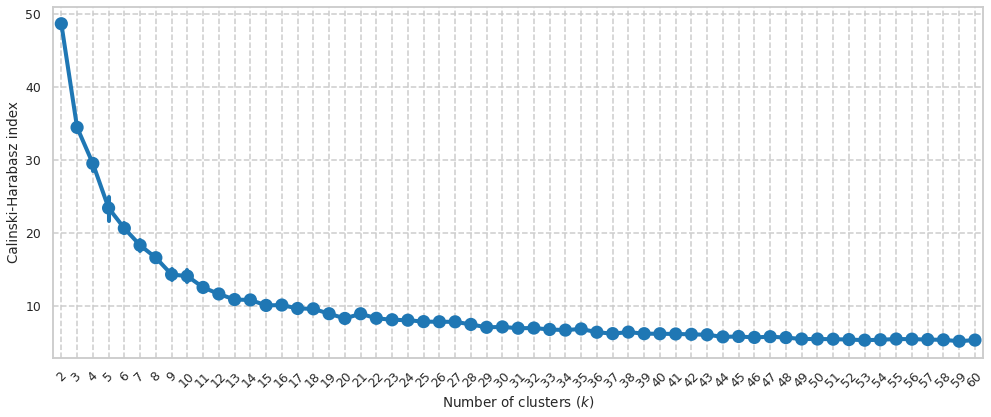

In [40]:
with sns.plotting_context("talk", font_scale=0.75), sns.axes_style(
    "whitegrid", {"grid.linestyle": "--"}
):
    fig = plt.figure(figsize=(14, 6))
    ax = sns.pointplot(data=ensemble, x="n_clusters", y="ch_score")
    ax.set_ylabel("Calinski-Harabasz index")
    ax.set_xlabel("Number of clusters ($k$)")
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
    plt.grid(True)
    plt.tight_layout()

# Stability

## Group ensemble by n_clusters

In [41]:
parts = ensemble.groupby("n_clusters").apply(
    lambda x: np.concatenate(x["partition"].apply(lambda x: x.reshape(1, -1)), axis=0)
)

In [42]:
parts.head()

n_clusters
2    [[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0,...
3    [[2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0,...
4    [[1.0, 1.0, 1.0, 2.0, 2.0, 2.0, 2.0, 2.0, 1.0,...
5    [[4.0, 4.0, 4.0, 1.0, 3.0, 1.0, 3.0, 3.0, 4.0,...
6    [[3.0, 3.0, 3.0, 4.0, 4.0, 1.0, 4.0, 4.0, 3.0,...
dtype: object

In [43]:
assert np.all(
    [
        parts.loc[k].shape == (CLUSTERING_OPTIONS["N_REPS_PER_K"], data.shape[0])
        for k in parts.index
    ]
)

## Compute stability

In [44]:
from sklearn.metrics import adjusted_rand_score as ari
from scipy.spatial.distance import pdist

In [45]:
parts_ari = pd.Series(
    {k: pdist(parts.loc[k], metric=ari) for k in parts.index}, name="k"
)

In [46]:
parts_ari_stability = parts_ari.apply(lambda x: x.mean())
display(parts_ari_stability.sort_values(ascending=False).head(15))

4     0.991868
2     0.889135
3     0.675956
25    0.607473
23    0.602520
32    0.552050
20    0.463958
17    0.431756
38    0.428257
21    0.415721
48    0.380374
52    0.379743
37    0.376845
22    0.365821
18    0.335141
Name: k, dtype: float64

In [47]:
parts_ari_df = pd.DataFrame.from_records(parts_ari.tolist()).set_index(
    parts_ari.index.copy()
)

In [48]:
parts_ari_df.shape

(59, 10)

In [49]:
assert (
    int(
        (CLUSTERING_OPTIONS["N_REPS_PER_K"] * (CLUSTERING_OPTIONS["N_REPS_PER_K"] - 1))
        / 2
    )
    == parts_ari_df.shape[1]
)

In [50]:
parts_ari_df.head()

,0,1,2,3,4,5,6,7,8,9
2,0.789459,1.000000,1.000000,0.868659,0.789459,0.789459,0.916994,1.000000,0.868659,0.868659
3,0.552461,0.544189,0.880921,0.532645,0.943774,0.473942,0.961229,0.467571,0.944738,0.458091
4,0.979671,1.000000,1.000000,1.000000,0.979671,0.979671,0.979671,1.000000,1.000000,1.000000
5,0.161693,0.268182,0.259158,0.374150,0.194436,0.168942,0.221341,0.251299,0.395143,0.391314
6,0.201074,0.208731,0.225741,0.287267,0.161693,0.185019,0.181084,0.211573,0.204509,0.256491


## Save

In [51]:
output_filename = Path(
    RESULTS_DIR,
    generate_result_set_name(
        CLUSTERING_OPTIONS,
        prefix=f"{clustering_method_name}-stability-",
        suffix=".pkl",
    ),
).resolve()
display(output_filename)

PosixPath('/home/miltondp/projects/labs/greenelab/phenoplier/base/results/clustering/runs/z_score_std-projection-smultixcan-efo_partial-mashr-zscores/KMeans-stability-KMEANS_N_INIT_10-K_MAX_60-K_MIN_2-N_REPS_PER_K_5.pkl')

In [52]:
parts_ari_df.to_pickle(output_filename)

## Stability plot

In [53]:
parts_ari_df_plot = (
    parts_ari_df.stack()
    .reset_index()
    .rename(columns={"level_0": "k", "level_1": "idx", 0: "ari"})
)

In [54]:
parts_ari_df_plot.dtypes

k        int64
idx      int64
ari    float64
dtype: object

In [55]:
parts_ari_df_plot.head()

,k,idx,ari
0,2,0,0.789459
1,2,1,1.000000
2,2,2,1.000000
3,2,3,0.868659
4,2,4,0.789459


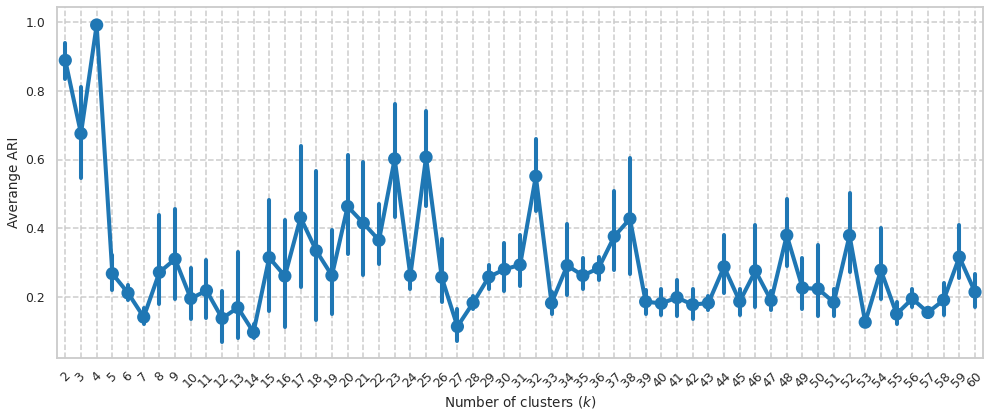

In [56]:
# with sns.axes_style('whitegrid', {'grid.linestyle': '--'}):
with sns.plotting_context("talk", font_scale=0.75), sns.axes_style(
    "whitegrid", {"grid.linestyle": "--"}
):
    fig = plt.figure(figsize=(14, 6))
    ax = sns.pointplot(data=parts_ari_df_plot, x="k", y="ari")
    ax.set_ylabel("Averange ARI")
    ax.set_xlabel("Number of clusters ($k$)")
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
    #     ax.set_ylim(0.0, 1.0)
    #     ax.set_xlim(CLUSTERING_OPTIONS['K_MIN'], CLUSTERING_OPTIONS['K_MAX'])
    plt.grid(True)
    plt.tight_layout()